In [1]:
conda install -c conda-forge pytrends

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US')

kw_list = ["Ixom", "Orica Chemicals", "Coogee Chemicals", "Cleveland Bay"]
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU-VIC', gprop='')
data_after_2015_VIC = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU-NSW', gprop='')
data_after_2015_NSW = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU-QLD', gprop='')
data_after_2015_QLD = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU-SA', gprop='')
data_after_2015_SA = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU-WA', gprop='')
data_after_2015_WA = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=12, timeframe='2009-01-01 2015-01-01', geo='AU', gprop='')
data_before_2015 = pytrends.interest_over_time()
pytrends.build_payload(kw_list, cat=12, timeframe='2015-03-01 2022-03-01', geo='AU', gprop='')
data_after_2015 = pytrends.interest_over_time()

In [3]:
mean_before = round(data_before_2015.mean(), 2)
mean_after = round(data_after_2015.mean(), 2)
for kw in kw_list:
    print(kw + ":" + str(mean_before[kw]))

Ixom:0.0
Orica Chemicals:21.71
Coogee Chemicals:14.04
Cleveland Bay:3.51


In [4]:
for kw in kw_list:
    print(kw + ":" + str(mean_after[kw]))

Ixom:41.07
Orica Chemicals:7.56
Coogee Chemicals:32.91
Cleveland Bay:11.09


In [5]:
data_after_2015_VIC.to_csv('Google Trend/data_after_2015_VIC.csv')
data_after_2015_NSW.to_csv('Google Trend/data_after_2015_NSW.csv')
data_after_2015_QLD.to_csv('Google Trend/data_after_2015_QLD.csv')
data_after_2015_SA.to_csv('Google Trend/data_after_2015_SA.csv')
data_after_2015_WA.to_csv('Google Trend/data_after_2015_WA.csv')

In [6]:
data_after_2015.to_csv('Google Trend/trends data after 2015.csv')
data_after_2015

,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay,isPartial
date,,,,,
2015-03-01,29,10,19,10,False
2015-04-01,51,63,20,0,False
2015-05-01,39,49,38,0,False
2015-06-01,50,0,50,10,False
2015-07-01,48,19,57,20,False
...,...,...,...,...,...
2021-11-01,44,9,35,9,False
2021-12-01,27,0,18,9,False
2022-01-01,33,8,41,17,False


In [7]:
data_before_2015.to_csv('Google Trend/trends data before 2015.csv')
data_before_2015

,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay,isPartial
date,,,,,
2009-01-01,0,33,18,0,False
2009-02-01,0,33,36,0,False
2009-03-01,0,0,31,0,False
2009-04-01,0,0,0,0,False
2009-05-01,0,68,30,0,False
...,...,...,...,...,...
2014-09-01,0,17,34,0,False
2014-10-01,0,21,5,9,False
2014-11-01,0,48,10,5,False


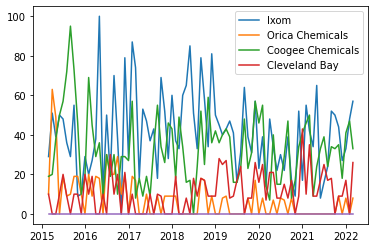

In [8]:
import matplotlib.pyplot as plt

plt.plot(data_after_2015)
plt.legend(kw_list)
plt.show()

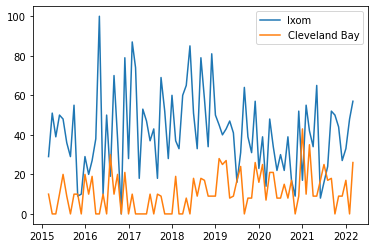

In [9]:
focus = ["Ixom", "Cleveland Bay"]
plt.plot(data_after_2015[focus])
plt.legend(focus)
plt.show()

In [10]:
region = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False)
region

,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay
geoName,,,,
Australian Capital Territory,0,0,0,0
New South Wales,64,13,18,5
Northern Territory,0,0,0,0
Queensland,16,0,28,56
South Australia,100,0,0,0
Tasmania,0,0,0,0
Victoria,72,14,12,2
Western Australia,15,0,85,0


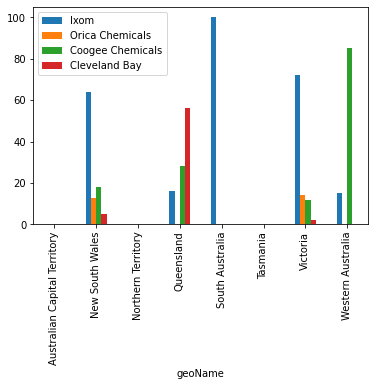

In [11]:
region.plot(kind = 'bar')
plt.show()

In [12]:
pytrends.related_queries() # related queries in last 7 years

{'Ixom': {'top':              query  value
  0            orica    100
  1   ixom chemicals     59
  2  orica chemicals     23
  3      ixom botany     22,
  'rising':              query    value
  0            orica  2083550
  1   ixom chemicals  1222450
  2  orica chemicals   483650
  3      ixom botany   460650},
 'Orica Chemicals': {'top':   query  value
  0  ixom    100,
  'rising':   query    value
  0  ixom  2392200},
 'Coogee Chemicals': {'top': None, 'rising': None},
 'Cleveland Bay': {'top':           query  value
  0  first choice    100,
  'rising':           query  value
  0  first choice    900}}

In [13]:
import pandas as pd
bigdata = pd.concat([data_before_2015, data_after_2015], sort=False)

In [14]:
bigdata

,Ixom,Orica Chemicals,Coogee Chemicals,Cleveland Bay,isPartial
date,,,,,
2009-01-01,0,33,18,0,False
2009-02-01,0,33,36,0,False
2009-03-01,0,0,31,0,False
2009-04-01,0,0,0,0,False
2009-05-01,0,68,30,0,False
...,...,...,...,...,...
2021-11-01,44,9,35,9,False
2021-12-01,27,0,18,9,False
2022-01-01,33,8,41,17,False
